Wir benuzten Logische Regression, um den Spam-Datensatz und Non-Spam Datensatz binär zu klassifizieren. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def file_get_contents(filename):
    return np.genfromtxt(filename, delimiter=',')

Wir lesen die Daten ein, und teile die in die Trainingdaten(80%) und Testendaten(20%).

In [5]:
data_original = file_get_contents('Resourcen/spambase.data')

def extract_training(data):
    length = int(0.8 * len(data))
    return data[:length]

def normal_training(data):
    data = extract_training(data)
    for i in range(len(data)):
        data[i] = normalisation(data[i])
    return data

def extract_test(data):
    test = np.copy(data)
    np.random.shuffle(test)  # da die Dateien nicht zufällig gemischt sind, mischen wir hier selbst mal
    length = int(0.2 * len(test))  
    return test[:length]

training_original = extract_training(data_original)
test_original = extract_test(data_original)

Bevor wir anfangen, müssen wir die Daten normalisieren.

In [7]:
def normalisation(sample):
    mean = get_mean(sample)
    diff = np.max(sample) - np.min(sample)
    for i in range(0, len(sample)):
        sample[i] = (sample[i]-mean)/diff
    return sample

def get_mean(data):
    return (np.sum(data))/len(data)

Wir brauen eine Aktivierungsfunktion, um alle Eingabewerte in den Interval [0,1] zuzuordnen. Hier wenden wir Sigmoid Funktion an.

In [8]:
def sigmoid(x):
    tmp = 1.0 + np.exp(-x)
    result = 1.0 / tmp
    return result

Um besser die Dateien zu trainieren, wir zerlegen die Samples und Labels.

In [9]:
def get_samples(training):
    training = np.delete(training, -1, axis=1)
    return np.matrix(training)


def get_labels(training):
    tmp = np.matrix(training[:, -1])
    return np.transpose(tmp)

Wir bilden eine Error Funktion, und minimieren wir die Error Funktion mithilfe von Gradient Descent, das Performance hängt stark von der Wahl der Learning Rate und Iterationsanzahl ab, hier wird ein paar Mal angepasst bis eine relativ kleine Error rate vorkommt.

In [10]:
def get_weight(training):
    data = get_samples(training)
    label = get_labels(training)
    learnRate = 0.99999
    m, n = np.shape(data)   # datamatirx: (m*n)
    weight = np.zeros((n, 1))  # initialer Gewicht Vektor, null Vektor oder zufällig konfigurieren

    for i in range(0, 5000):
        predict = sigmoid(np.dot(data, weight))  # (m*n)*(n*1)=(m*1) Matrix
        error = np.subtract(predict, label)      # (m*1)-(m*1)
        tmp = np.dot(np.transpose(data), error)  # (n*m)*(m*1)=(n*1) Matrix
        '''(n*1) Gewicht Vektor (entspricht zur Sprung Richtung) wird aktualisiert'''
        weight = np.subtract(weight, np.dot(learnRate, tmp))
        learnRate -= 0.00001 # am Anfang relativ große Learning Rate, und schrittweise reduzieren

    return weight

Dann können wir schon klassifizieren, vergleichen wir das Ergebnis nach Sigmoid Funktion, ob es größer als 1/2 ist, da es die Wahrscheinlichkeit der Ereignisse entspricht.

In [11]:
def classify(training, test, weight):
    testdata = test[: -1]
    prediction = np.dot(np.transpose(weight), testdata)
    probability = sigmoid(prediction)
    if (probability > 0.5):   # entspricht zur p > 1-p, und p liegt im Interval [0,1]
        return 1
    else: return 0

Schauen wir uns mal die Error Rate an.

In [16]:
def error_rate(training, test):
    weight = get_weight(training)
    error = 0
    for i in range(0, len(test)):
        lable = test[i][-1]
        result = classify(training, test[i], weight)
        if (result != lable):
            error += 1
    return (error/len(test))*100

print('error rate ist', error_rate(training_original, test_original), '%')

/Users/hongzhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


error rate ist 35.108695652173914 %


Jetzt visualisieren wir das Ergebnis, um zu schauen was ist da passiert, wir wählen zwei Merkmale zu ploten, statt n-dimensional zu betrachten. Hier werden die Durchschnitt und Maximum gewählt (Grund kein Minimum: sind bei allen Samples das Minimum 0).

/Users/hongzhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


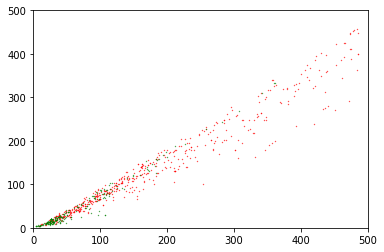

36.630434782608695
None


In [19]:
def ploting(data, colour):
    data = np.matrix(data)
    mean = []
    max = []

    for i in range(len(data)):
        mean_i = get_mean(data[i])
        max_i = np.max(data[i])
        mean.append(mean_i)
        max.append(max_i)
    mean = np.array(list(np.matrix(mean)))
    max = np.array(list(np.matrix(max)))
    x = mean[0][0]
    y = max[0][0]
    plt.scatter(x, y, 0.1, color= colour)
    plt.xlim(0, 500)
    plt.ylim(0, 500)
    
def get_class_plot(training, test):
    weight = get_weight(training)
    spam = []
    non_spam = []
    for i in range(0, len(test)):
        result = classify(training, test[i], weight)
        if (result == 1):
            spam.append(test[i])
        else: non_spam.append(test[i])
    ploting(spam, 'r')
    ploting(non_spam, 'g')
    plt.show()
    print(error_rate(training, test))

data = list(data_original)
training = np.matrix(extract_training(data))
test = extract_test(data)

print(get_class_plot(training_original, test))

Wir bilden jetzt eine Konfusions Matrix ab.

In [20]:
def confusion_matrix(training, test, weight):
    matrix = np.zeros((2, 2))

    for i in range(0, len(test)):
        if (classify(training, test[i], weight) == 1):
            if (test[i][57] == 1):
                a = matrix[0][0]
                a += 1
                matrix.itemset((0, 0), a)
            else:
                a = matrix[1][0]
                a += 1
                matrix.itemset((1, 0), a)
        elif (test[i][57] == 0):
            a = matrix[1][1]
            a += 1
            matrix.itemset((1, 1), a)
        else:
            a = matrix[1][0]
            a += 1
            matrix.itemset((1, 0), a)
    return matrix

weight = get_weight(training_original)

print(confusion_matrix(training_original, test_original, weight))

/Users/hongzhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[345.   0.]
 [323. 252.]]
